# **Máquina de soporte vectorial (SVM) con kernel**



La función 'svm.SVC()' de *sklearn* permite utilizar la Máquina de Soporte Vectorial para clasificación utilizado Kernels.

Sus parámetros principales son:
* 'C' Por default 1.0, es el parámetro de regularización que penaliza la métrica $L_2=||w||$ en la función objetivo.
* 'kernel' Especifica el kernel utilizado en el algoritmo.
* 'degree' Grado del Kernel polinomial (funciona solo con 'kernel="poly"').
* 'coef0' Termino independiente en la función de Kernel (sirve solo para los casos 'poly' y 'sigmoid')
* 'gamma' Es un coeficiente que controla la influencia de cada individuo de la muestra en la superficie de decesión.

## **Kernels**

Las opciones de Kernel que puede utilizar la función son:
* 'linear' Que equivale al SVM clásico
$$K(x,z) = (x^Tz)$$
* 'poly' Polinomial (requiere establecer el parámetro 'degree')
$$K(x,z) = (\gamma x^Tz + c)^q$$
* 'rbf' Función de base radial o kernel "gaussiano".
$$K(x,z) = \exp{(-\gamma ||x-z||^2)}$$
* 'sigmoid' Kernel tangente hiperbólico.
$$K(x,z) = \tanh{(\gamma x^T z + c)}$$

In [ ]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importar datos
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target
df['class'] = df['class'].replace(0, -1)
columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'class']
class_names = data["target_names"]

In [ ]:
# Funció para Graficar superficies de decisión
def GraficaSuperficiesDedcision(models, names, X, y):
  fig, sub = plt.subplots(2, 2, figsize=(15, 15))

  for clf, title, ax in zip(models, names, sub.flatten()):
      disp = DecisionBoundaryDisplay.from_estimator(
          clf,
          X,
          response_method="predict",
          cmap=plt.cm.coolwarm,
          alpha=0.7,
          ax=ax,
          xlabel=class_names[0],
          ylabel=class_names[1],
      )
      ax.scatter(X["mean radius"], X["mean texture"], c=y,
                cmap="coolwarm", marker=".", alpha=0.5)
      ax.set_xticks(())
      ax.set_yticks(())
      ax.set_title(title)
  plt.show()

In [ ]:
print(class_names)
df[columns]

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,-1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,-1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,-1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,-1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,-1
...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,-1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,-1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,-1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,-1


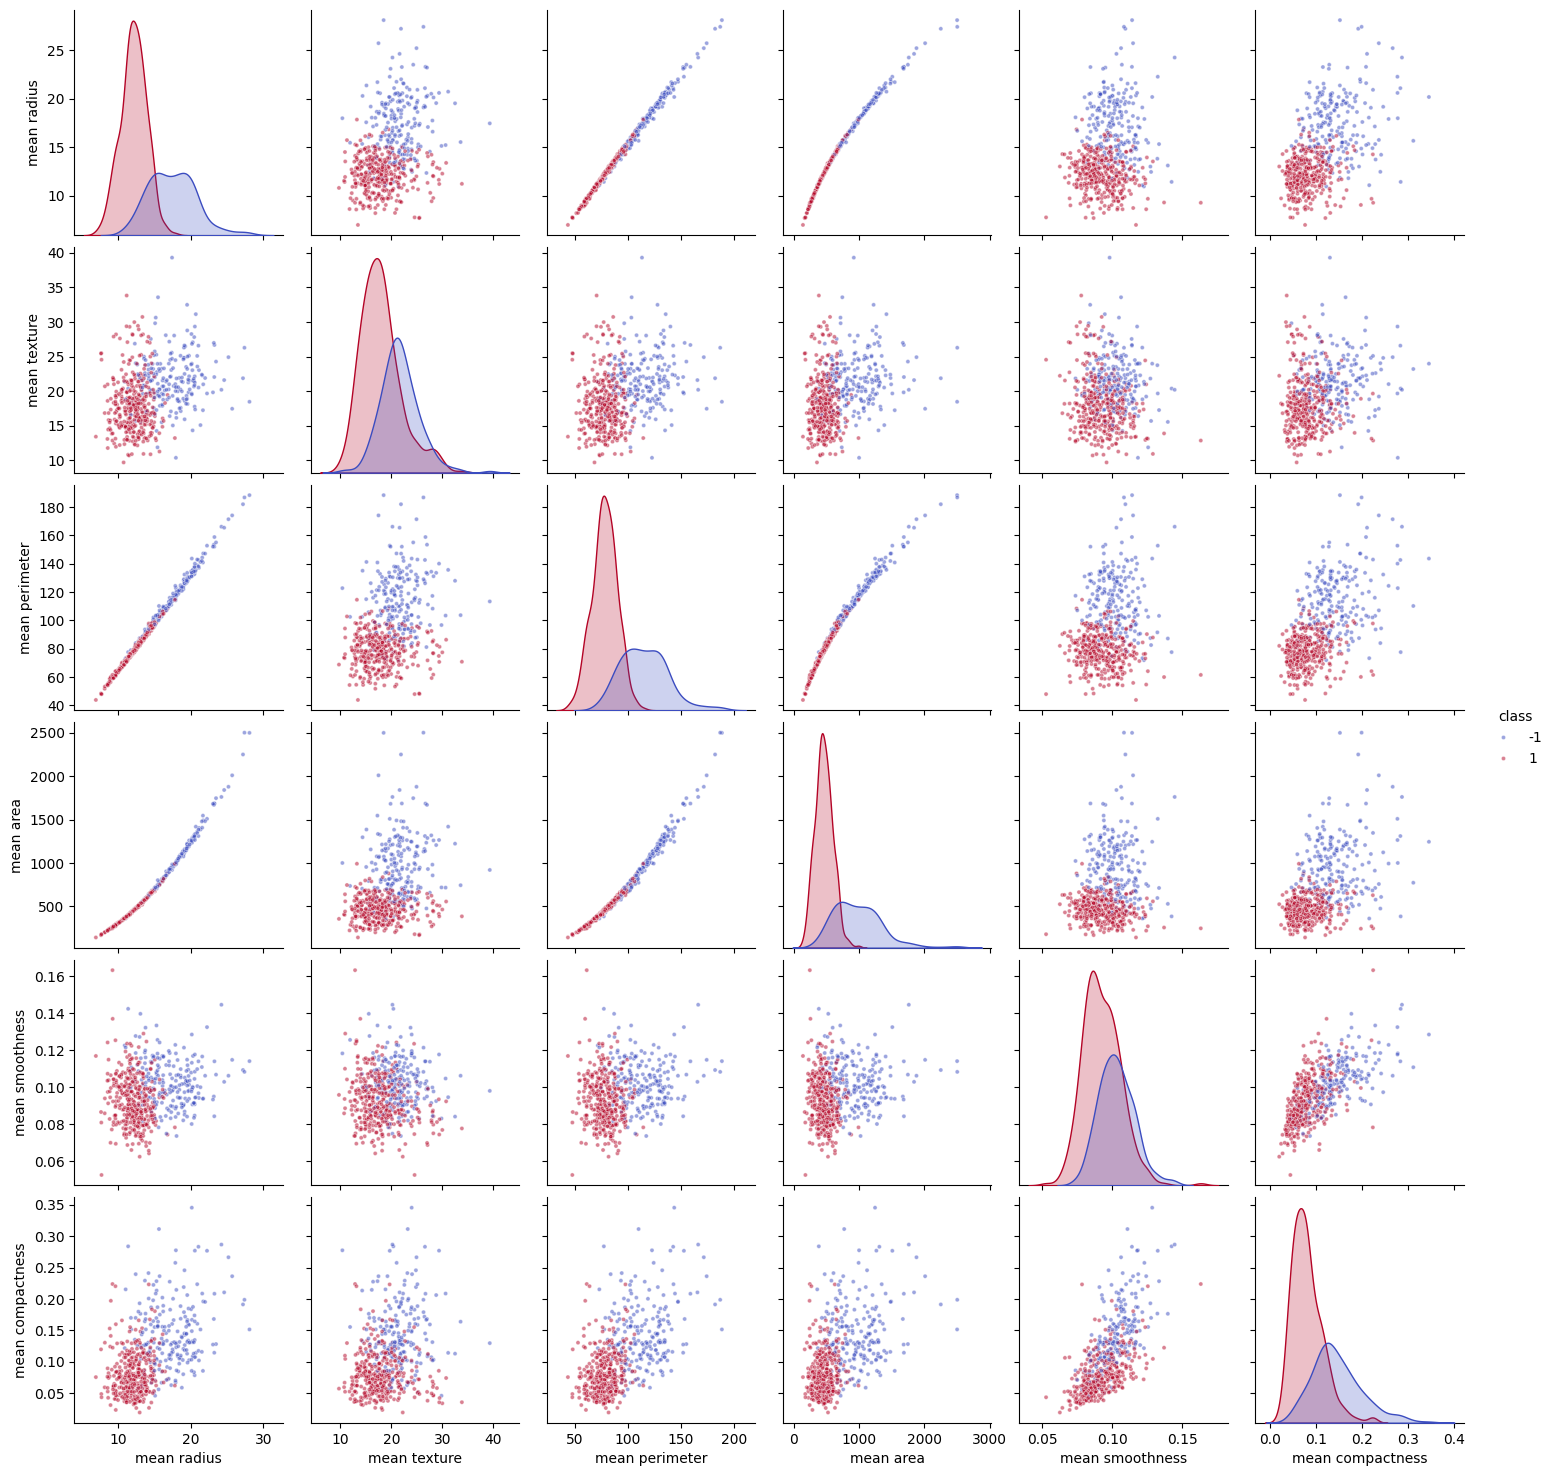

In [ ]:
sns.pairplot(df[columns],
             hue='class',
             palette="coolwarm",
             plot_kws={"marker":".", "alpha": 0.5})

In [ ]:
# Seleccionar los datos
X = df[['mean radius', 'mean texture']]
y = df['class']

### Datos sin estandarizar

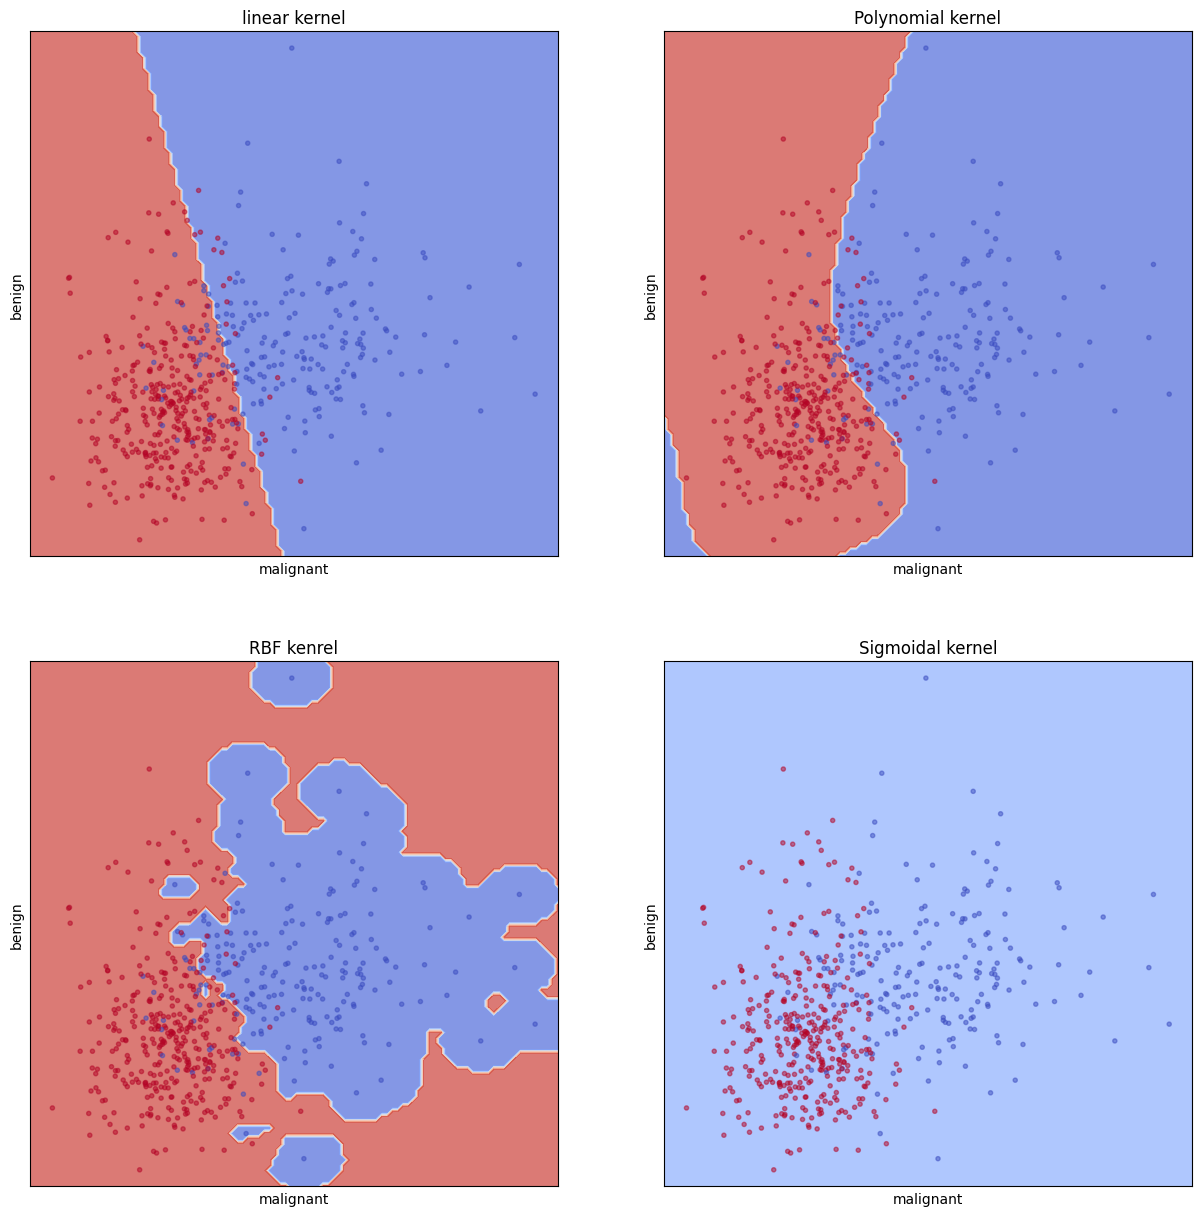

In [ ]:
# Definir parámetros
C = 1
gamma = 2
degree = 3
coef0 = 1
# Definir modelos
models = [svm.SVC(kernel="linear", C=C),
          svm.SVC(kernel="poly", degree=degree, gamma=gamma, C=C, coef0=coef0),
          svm.SVC(kernel="rbf", gamma=gamma, C=C),
          svm.SVC(kernel="sigmoid", gamma=gamma, C=C, coef0=coef0)]
names = ['linear kernel',
         'Polynomial kernel',
         'RBF kenrel',
         'Sigmoidal kernel']
# Ajustar modelos
models = (clf.fit(X, y) for clf in models)
# Graficar modelos
GraficaSuperficiesDedcision(models, names, X, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Función para generar datos en espiral
def generar_espiral(n_puntos=100, ruido=0.5):
    n = np.sqrt(np.random.rand(n_puntos)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_puntos) * ruido
    d1y = np.sin(n) * n + np.random.rand(n_puntos) * ruido
    X1 = np.vstack([d1x, d1y]).T
    Y1 = np.zeros(n_puntos)

    d2x = np.cos(n) * n + np.random.rand(n_puntos) * ruido
    d2y = -np.sin(n) * n + np.random.rand(n_puntos) * ruido
    X2 = np.vstack([d2x, d2y]).T
    Y2 = np.ones(n_puntos)

    X = np.vstack([X1, X2])
    y = np.hstack([Y1, Y2])
    return X, y

# Crear los datos
X, y = generar_espiral(150, ruido=0.4)